# Heart Dataset

It's a Regreesion Problem.

## steps -

- [Installation](#installation)
- [cleanup](#Dataset_cleanup)
- [EDA](#EDA)
- [Feature_selection](#Feature_selection)
- [feature_extraction](#Feature_extraction)
- [model_selection](#Model_selection)

## Installation

- IMPORT ALL REQUIRED LIBRARIES


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

import template


C:\Users\Suraj\AppData\Local\Temp\ipykernel_18768\3893149989.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
get_dir = os.getcwd()
data_dir = os.path.join(get_dir,"Datasets","heart.csv")
data = pd.read_csv(data_dir)

# Dataset_cleanup

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0.23
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0.37
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0.24
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0.28
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0.21


In [4]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target      float64
dtype: object

In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.536390
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.285822
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.260000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,0.710000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,0.810000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.900000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 112.2 KB


In [7]:
data_val = template.data_val(data)
zero_count = data_val.zero_count()
print(zero_count)

   Column_name  Zeros
0          age      0
1          sex    312
2           cp    497
3     trestbps      0
4         chol      0
5          fbs    872
6      restecg    497
7      thalach      0
8        exang    680
9      oldpeak    329
10       slope     74
11          ca    578
12        thal      7
13      target      0


In [8]:
data["fbs"].unique()

array([0, 1], dtype=int64)

The number of zero counts is not equal to the total number of samples. This indicates that there are no columns with all zero values
though column "fbs" has 85% zero counts but for now keep this feature

# EDA

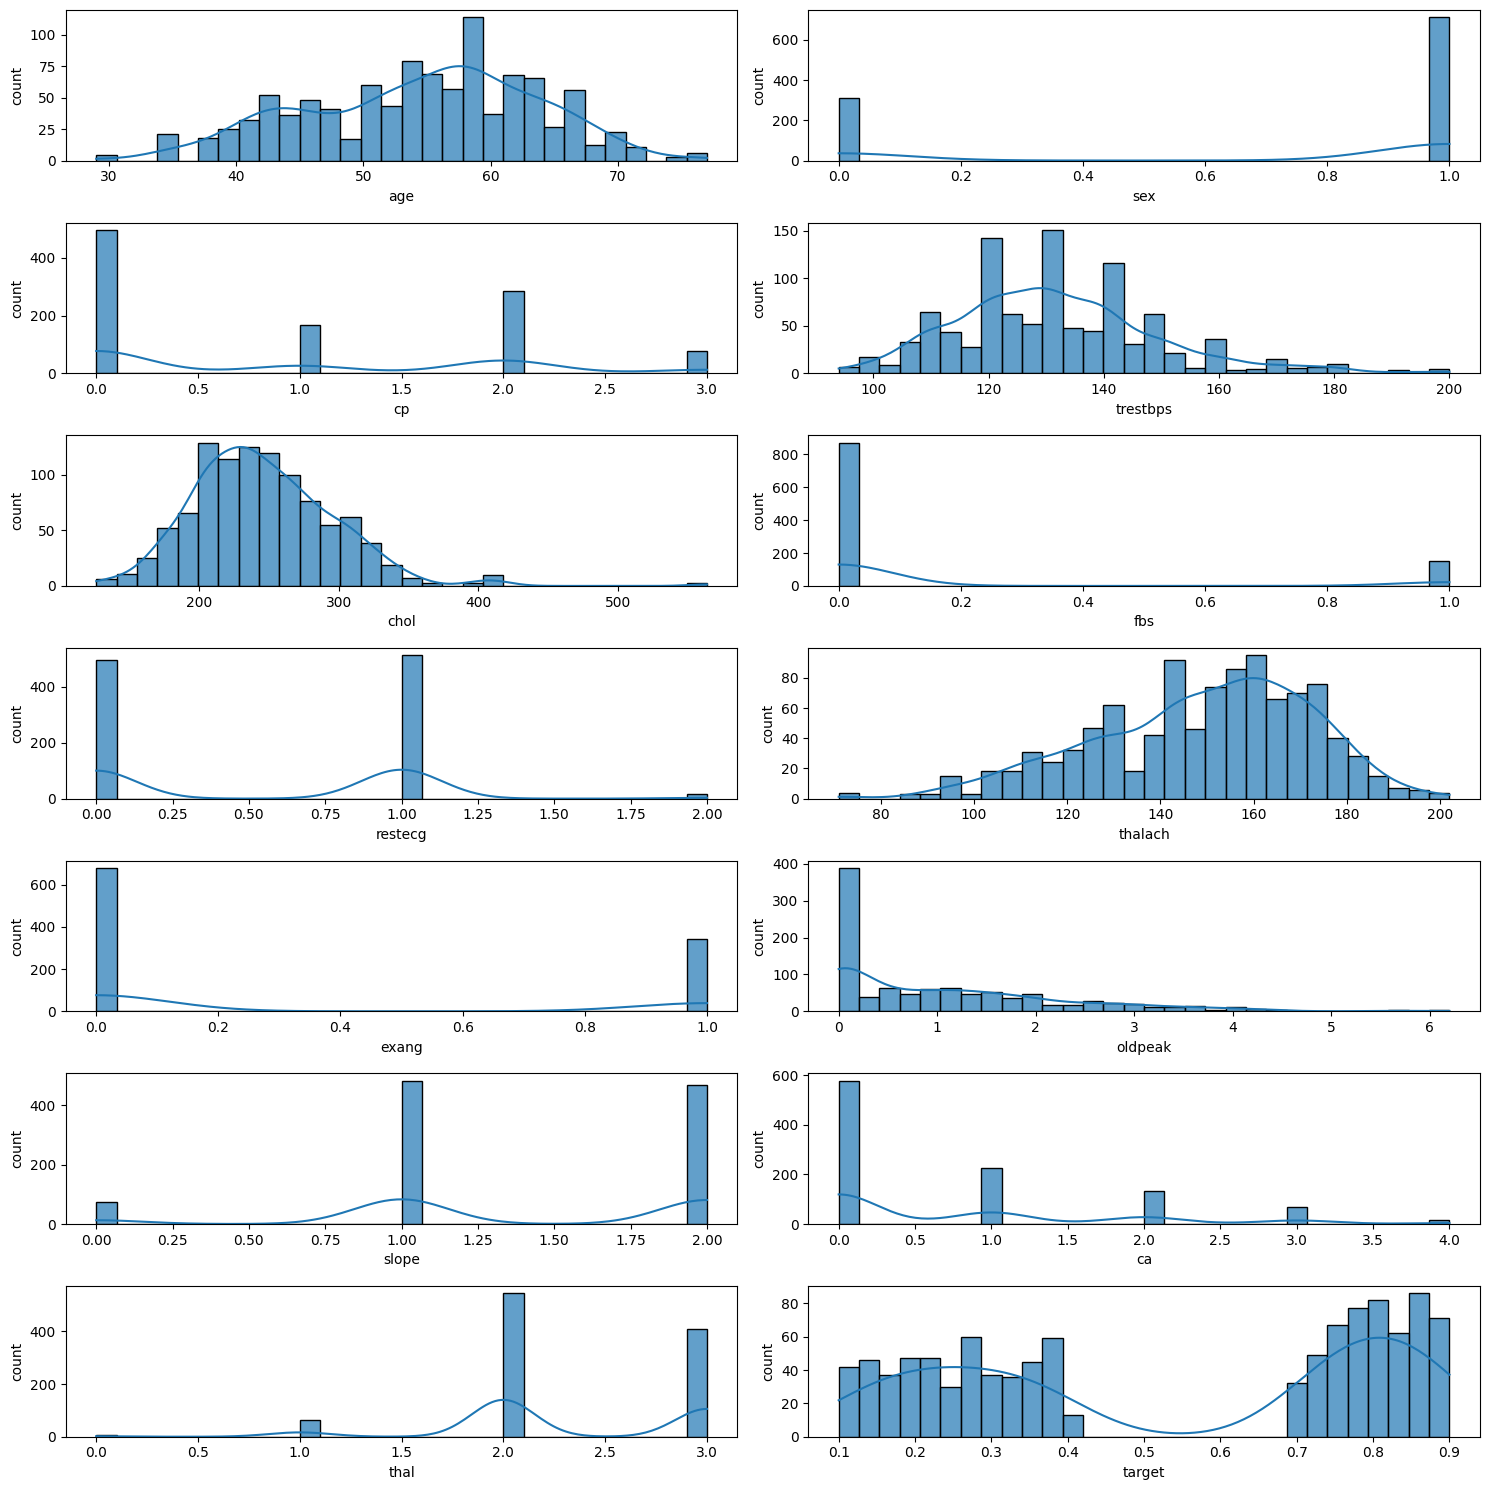

In [9]:
data_val.histplot_columns1(7,2,figuresize=(15,15))

In [10]:
column_type = data_val.get_column_type()

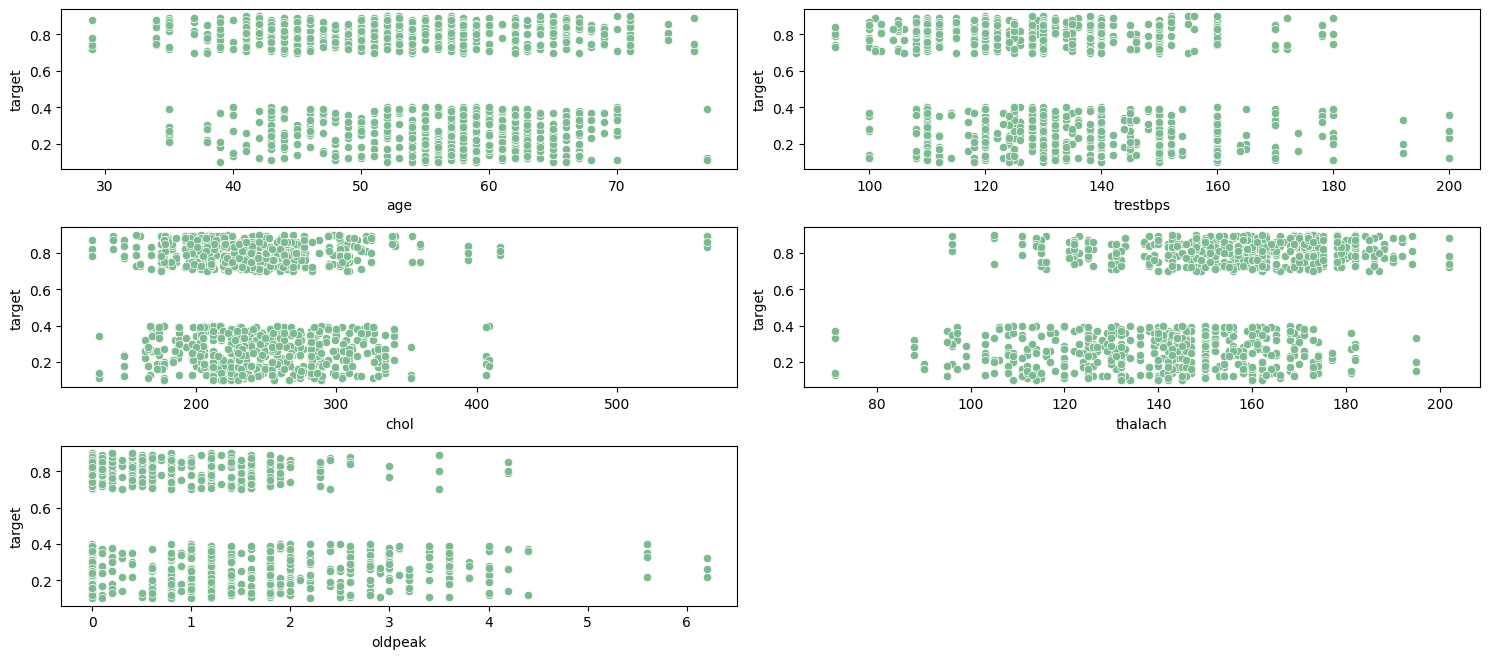

In [11]:
data_val.scatterplot1(7,2,figuresize=(15,15),column_type=column_type)

In [12]:
numerical_column = []
for i in data.columns:
    if column_type[i] == "numerical":
        numerical_column.append(i)


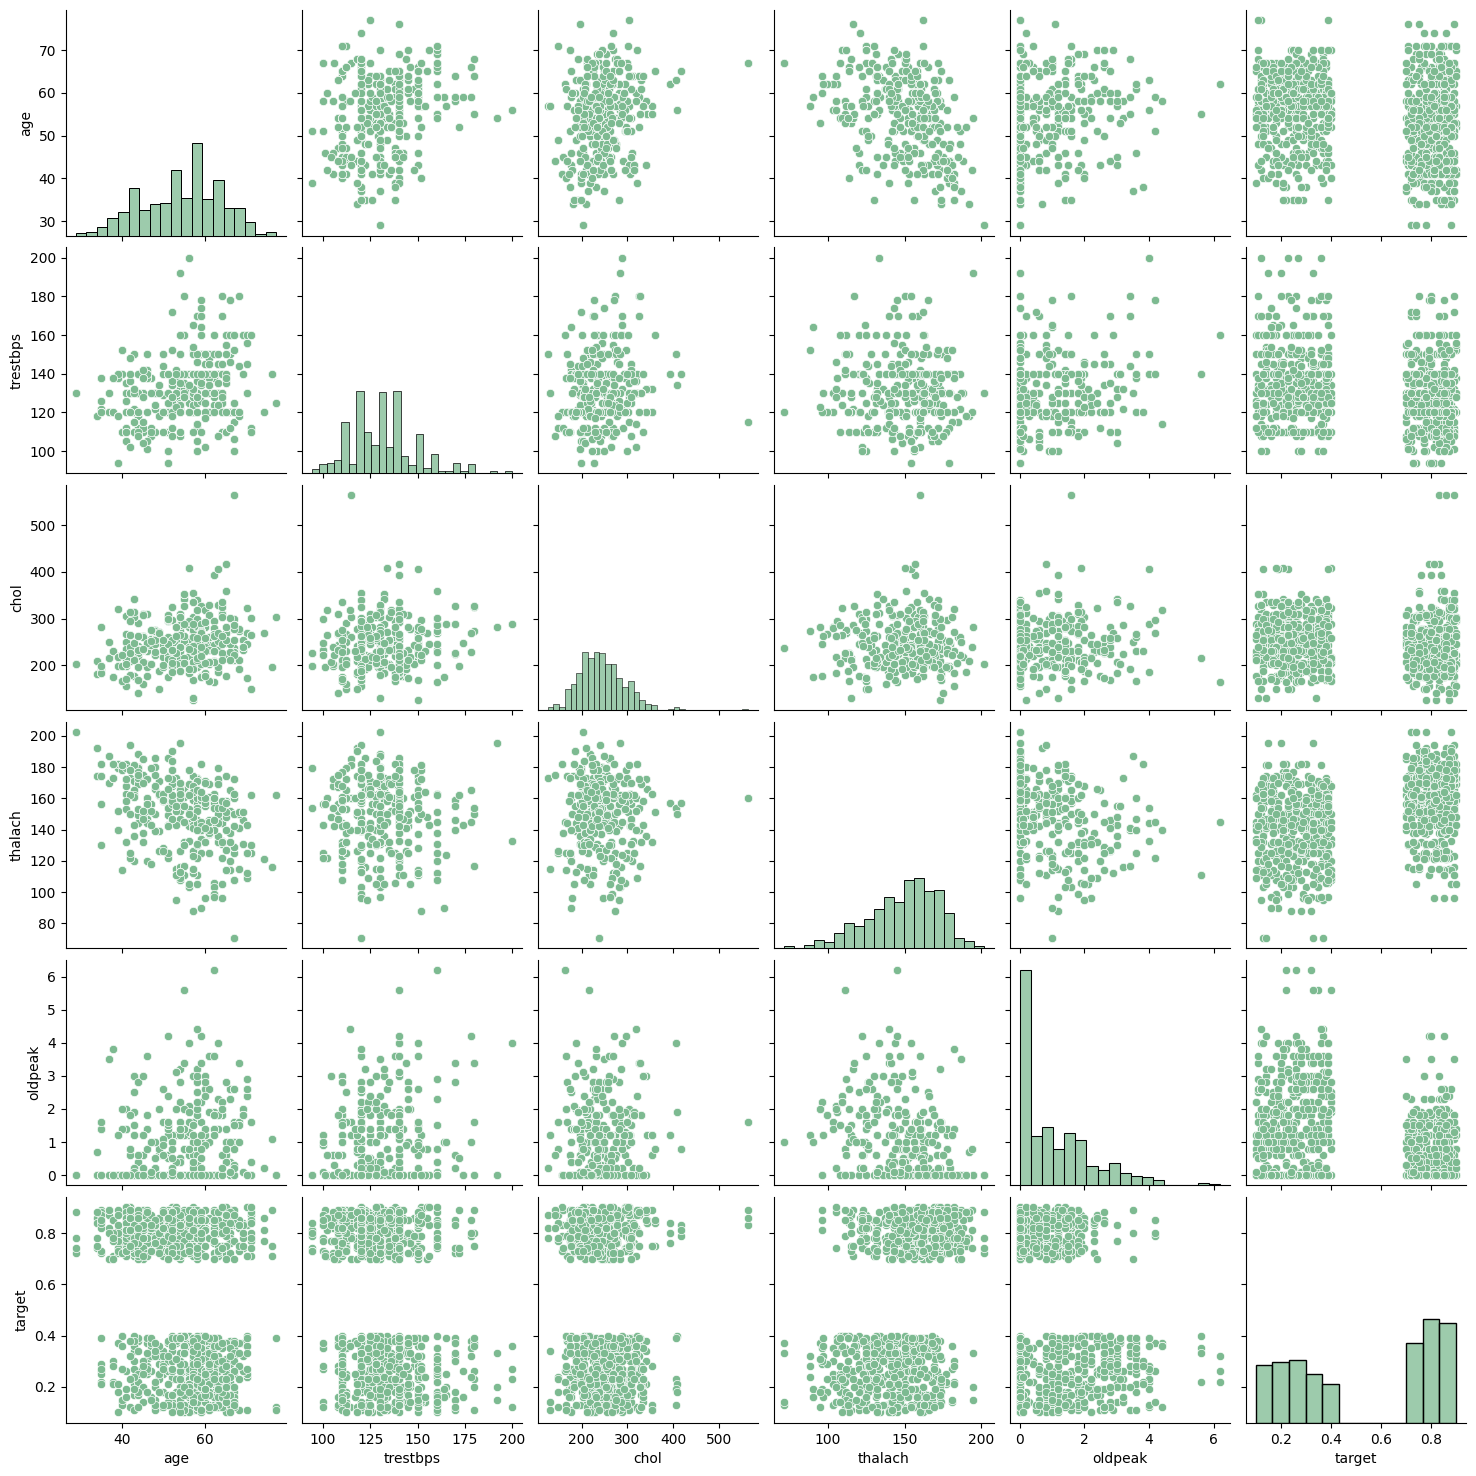

In [13]:
sns.pairplot(data = data[numerical_column])

In [14]:
print(pd.DataFrame(list(column_type.items()), columns=["columns","type"]))

     columns         type
0        age    numerical
1        sex  categorical
2         cp  categorical
3   trestbps    numerical
4       chol    numerical
5        fbs  categorical
6    restecg  categorical
7    thalach    numerical
8      exang  categorical
9    oldpeak    numerical
10     slope  categorical
11        ca  categorical
12      thal  categorical
13    target    numerical


In [15]:
schema = data_val.schema()
print(schema)

     columns    dtype
0        age    int64
1        sex    int64
2         cp    int64
3   trestbps    int64
4       chol    int64
5        fbs    int64
6    restecg    int64
7    thalach    int64
8      exang    int64
9    oldpeak  float64
10     slope    int64
11        ca    int64
12      thal    int64
13    target  float64


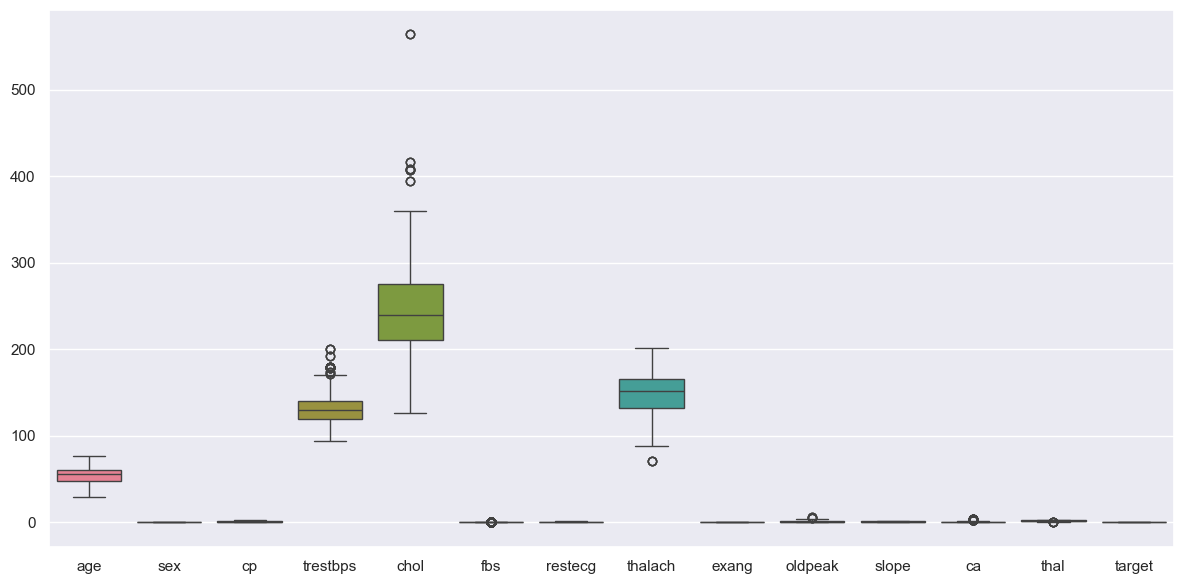

In [16]:
sns.set_theme()
plt.figure(figsize=(12,6))
sns.boxplot(data=data)
plt.tight_layout()
plt.show()

In [17]:
data_cleaned = data_val.remove_outliers()

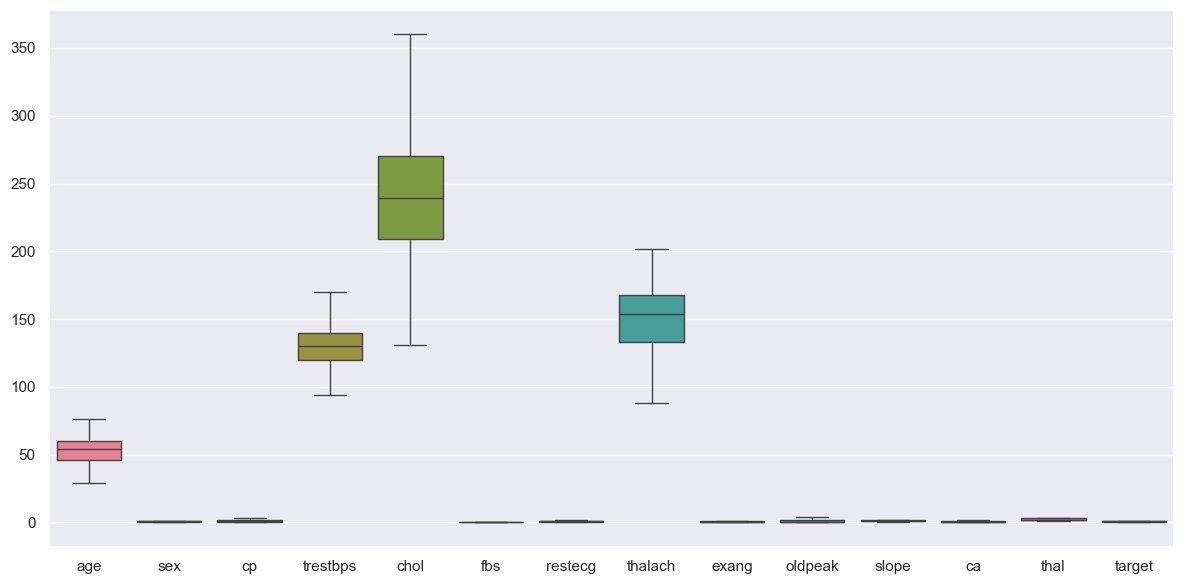

In [18]:
sns.set_theme()
plt.figure(figsize=(12,6))
sns.boxplot(data=data_cleaned)
plt.tight_layout()
plt.show()

In [19]:
data_scaled = data_val.scale_dataset(scaler1=MinMaxScaler)

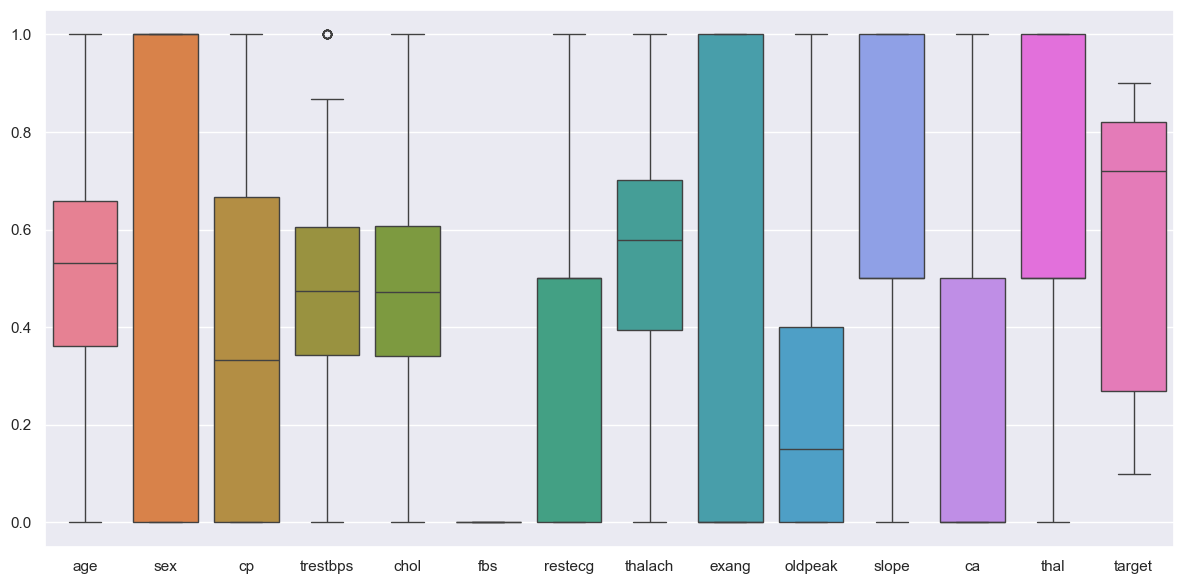

In [20]:
sns.set_theme()
plt.figure(figsize=(12,6))
sns.boxplot(data=data_scaled)
plt.tight_layout()
plt.show()

<Axes: ylabel='Density'>

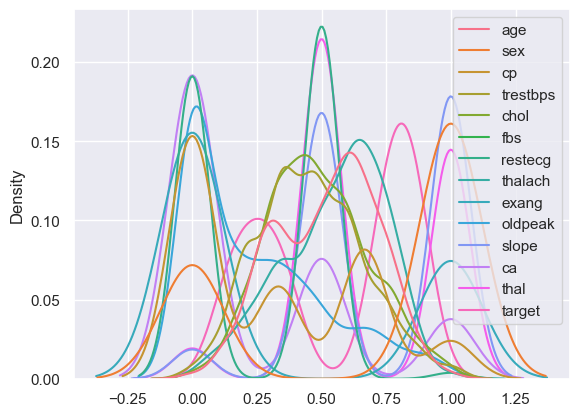

In [21]:
sns.kdeplot(data=data_scaled)

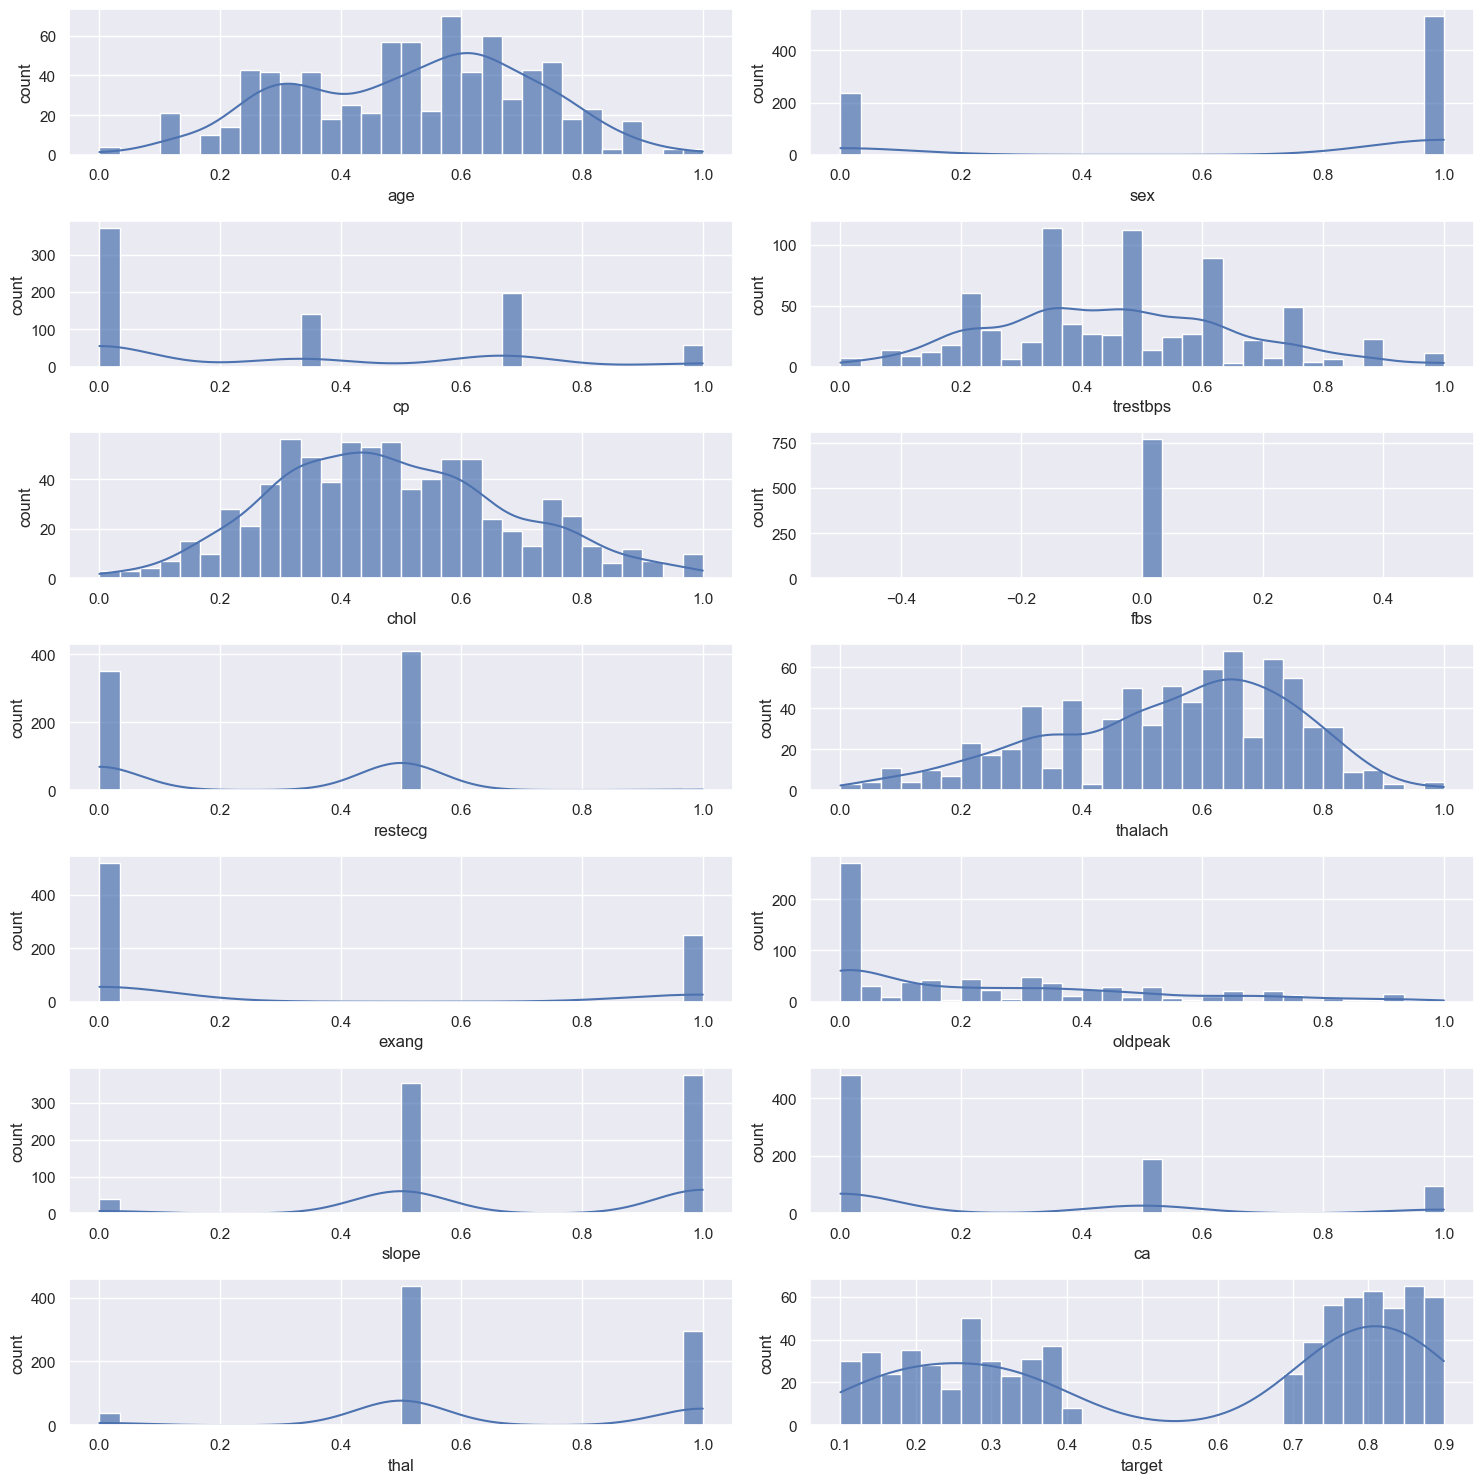

In [22]:
data_val.histplot_columns1(7,2,figuresize=(15,15))

In [23]:
data_scaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.489362,1.0,0.0,0.407895,0.353712,0.0,0.5,0.701754,0.0,0.25,1.0,1.0,1.0,0.23
1,0.872340,1.0,0.0,0.671053,0.187773,0.0,0.5,0.324561,1.0,0.65,0.0,0.0,1.0,0.24
2,0.680851,1.0,0.0,0.710526,0.314410,0.0,0.5,0.640351,0.0,0.00,1.0,0.5,1.0,0.28
3,0.617021,0.0,0.0,0.078947,0.510917,0.0,0.0,0.298246,0.0,0.25,0.5,0.0,0.5,0.78
4,0.553191,1.0,0.0,0.868421,0.689956,0.0,0.0,0.500000,1.0,0.20,0.5,0.5,1.0,0.17


In [24]:
data_scaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.489362,1.0,0.0,0.407895,0.353712,0.0,0.5,0.701754,0.0,0.25,1.0,1.0,1.0,0.23
1,0.872340,1.0,0.0,0.671053,0.187773,0.0,0.5,0.324561,1.0,0.65,0.0,0.0,1.0,0.24
2,0.680851,1.0,0.0,0.710526,0.314410,0.0,0.5,0.640351,0.0,0.00,1.0,0.5,1.0,0.28
3,0.617021,0.0,0.0,0.078947,0.510917,0.0,0.0,0.298246,0.0,0.25,0.5,0.0,0.5,0.78
4,0.553191,1.0,0.0,0.868421,0.689956,0.0,0.0,0.500000,1.0,0.20,0.5,0.5,1.0,0.17


<Axes: >

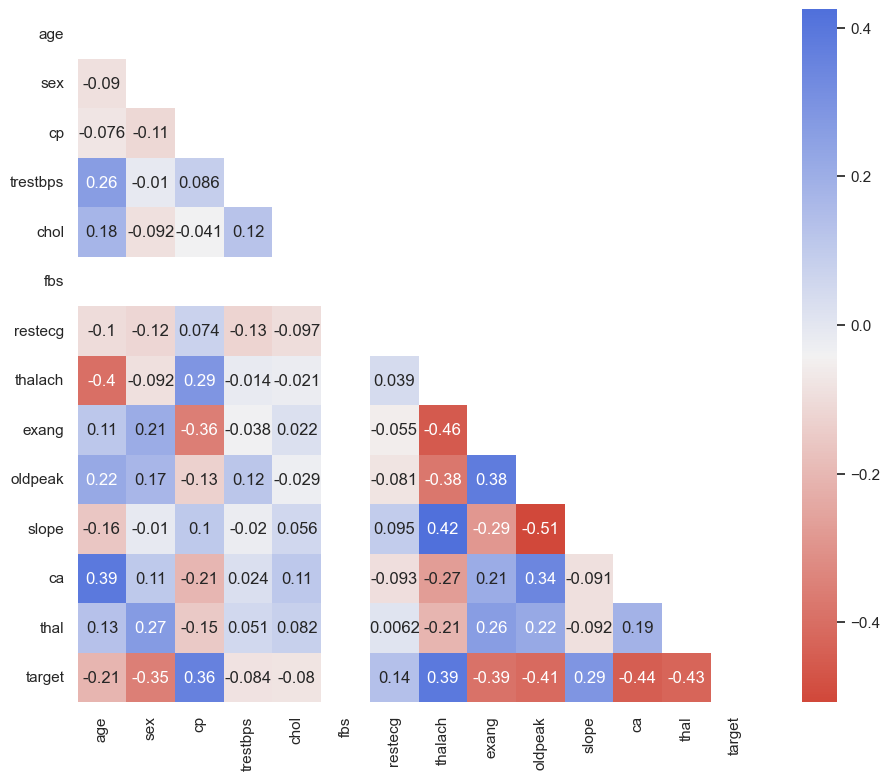

In [25]:
corrmap = data_scaled.corr()
sns.set_theme(style="white")
plt.figure(figsize=(11,9))
mask = np.triu(np.ones_like(corrmap, dtype=bool))
cmap = sns.diverging_palette(15,260, as_cmap=True)
sns.heatmap(corrmap,cmap=cmap,mask=mask,annot=True)

In [26]:
x = data.drop(columns="target")
y = data["target"]

In [27]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x,y,test_size=0.2,random_state=42)

# Feature_selection

UNIVARIATE FEATURE SELECTION

In [28]:
from sklearn.feature_selection import SelectKBest,f_regression,mutual_info_regression

In [29]:
x_train2 = SelectKBest(f_regression,k=8).fit(x_train1,y_train1)

In [30]:
x_train3 = SelectKBest(mutual_info_regression,k=8).fit(x_train1,y_train1)

In [31]:
selcted_features1 = x_train2.get_feature_names_out()

selcted_features2 = x_train3.get_feature_names_out()
print(selcted_features1,"\n",selcted_features2)

['sex' 'cp' 'thalach' 'exang' 'oldpeak' 'slope' 'ca' 'thal'] 
 ['cp' 'chol' 'thalach' 'exang' 'oldpeak' 'slope' 'ca' 'thal']


In [32]:
features_set1 = set(selcted_features1)
features_set2 = set(selcted_features2)
combined_features_set = features_set1.union(features_set2)
combined_features_list = list(combined_features_set)
print(combined_features_list)

['exang', 'thalach', 'chol', 'thal', 'slope', 'oldpeak', 'cp', 'ca', 'sex']


lets just analyse and summarise what we have seen about data till now :
1. Data has no linear relationship between feature and target
2. Data has nearly 12 features
3. Data has 1025 sample size per column
4. Nearly 4 feature has 0.4 or higher correlation with target
5. 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import  make_pipeline
from sklearn.linear_model import (LinearRegression, Ridge, RidgeCV, SGDRegressor, ElasticNet, ElasticNetCV, 
                                  LarsCV, Lasso, LassoCV, LassoLars, LassoLarsCV, LassoLarsIC, ARDRegression, 
                                  BayesianRidge, HuberRegressor, QuantileRegressor, RANSACRegressor, 
                                  TheilSenRegressor, GammaRegressor, PoissonRegressor, TweedieRegressor, 
                                  PassiveAggressiveRegressor)
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the models
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "RidgeCV": RidgeCV(),
    "Lasso": Lasso(),
    "LassoCV": LassoCV(),
    "LassoLars": LassoLars(),
    "LassoLarsCV": LassoLarsCV(),
    "LassoLarsIC": LassoLarsIC(),
    "BayesianRidge": BayesianRidge(),
    #"SGDRegressor": SGDRegressor(),
    "ElasticNet": ElasticNet(),
    "ElasticNetCV": ElasticNetCV(),
    "LarsCV": LarsCV(),
    "ARDRegression": ARDRegression(),
    "HuberRegressor": HuberRegressor(),
    #"QuantileRegressor": QuantileRegressor(),
    #"RANSACRegressor": RANSACRegressor(),
    #"TheilSenRegressor": TheilSenRegressor(),
    #"GammaRegressor": GammaRegressor(),
    #"PoissonRegressor": PoissonRegressor(),
    "TweedieRegressor": TweedieRegressor(),
    #"PassiveAggressiveRegressor": PassiveAggressiveRegressor()
}

# Store the accuracy results
accuracy_results = {}

# Assuming X_train, X_test, y_train, y_test are already defined

for i, (name, model) in enumerate(models.items()):
    poly = PolynomialFeatures(degree=2)
    model = make_pipeline(poly, model)
    model.fit(x_train1, y_train1)
    
    y_train_pred = model.predict(x_train1)
    y_test_pred = model.predict(x_test1)
    
    print(f"\033[1m{i+1}. {name}\033[0m")
    print(f"Training R2 Score: {r2_score(y_train1, y_train_pred)}")
    print(f"Testing R2 Score: {r2_score(y_test1, y_test_pred)}")
    print(f"Training Mean Squared Error: {mean_squared_error(y_train1, y_train_pred)}")
    print(f"Testing Mean Squared Error: {mean_squared_error(y_test1, y_test_pred)}")
    print("----------------------------------------------------------------")
    
    accuracy_results[name] = r2_score(y_test1, y_test_pred)

# Print out all accuracy results
for name, accuracy in accuracy_results.items():
    print(f"{name}: {accuracy}")


1. LinearRegression
Training R2 Score: 0.6256114103645358
Testing R2 Score: 0.43504434920036583
Training Mean Squared Error: 0.030816964626534472
Testing Mean Squared Error: 0.04448753186672462
----------------------------------------------------------------
2. Ridge
Training R2 Score: 0.6919634551615075
Testing R2 Score: 0.5380153252652289
Training Mean Squared Error: 0.025355343535471146
Testing Mean Squared Error: 0.03637906428604014
----------------------------------------------------------------
3. RidgeCV
Training R2 Score: 0.6919634329583494
Testing R2 Score: 0.5380148582653111
Training Mean Squared Error: 0.02535534536307475
Testing Mean Squared Error: 0.036379101060030616
----------------------------------------------------------------
4. Lasso
Training R2 Score: 0.49330839985513686
Testing R2 Score: 0.3369049739053567
Training Mean Squared Error: 0.04170719287526942
Testing Mean Squared Error: 0.05221553419688556
---------------------------------------------------------------

  File "d:\Applications\Python\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


15. TweedieRegressor
Training R2 Score: 0.4933880571406186
Testing R2 Score: 0.3311468624498566
Training Mean Squared Error: 0.04170063606286408
Testing Mean Squared Error: 0.05266895769394438
----------------------------------------------------------------
LinearRegression: 0.43504434920036583
Ridge: 0.5380153252652289
RidgeCV: 0.5380148582653111
Lasso: 0.3369049739053567
LassoCV: 0.3395631391066567
LassoLars: 0.33690920191981444
LassoLarsCV: 0.5379317180830051
LassoLarsIC: 0.5379085795280987
BayesianRidge: 0.36280209424187304
ElasticNet: 0.3471847842384501
ElasticNetCV: 0.33955891277585026
LarsCV: 0.3240433036873921
ARDRegression: 0.47339971311966755
HuberRegressor: 0.26793908577007164
TweedieRegressor: 0.3311468624498566


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the models
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "RidgeCV": RidgeCV(),
    "Lasso": Lasso(),
    "LassoCV": LassoCV(),
    "LassoLars": LassoLars(),
    "LassoLarsCV": LassoLarsCV(),
    "LassoLarsIC": LassoLarsIC(),
    "BayesianRidge": BayesianRidge(),
    #"SGDRegressor": SGDRegressor(),
    "ElasticNet": ElasticNet(),
    "ElasticNetCV": ElasticNetCV(),
    "LarsCV": LarsCV(),
    "ARDRegression": ARDRegression(),
    "HuberRegressor": HuberRegressor(),
    #"QuantileRegressor": QuantileRegressor(),
    #"RANSACRegressor": RANSACRegressor(),
    #"TheilSenRegressor": TheilSenRegressor(),
    #"GammaRegressor": GammaRegressor(),
    #"PoissonRegressor": PoissonRegressor(),
    "TweedieRegressor": TweedieRegressor(),
    #"PassiveAggressiveRegressor": PassiveAggressiveRegressor()
}

# Store the accuracy results
accuracy_results = {}

# Assuming X_train, X_test, y_train, y_test are already defined

for i, (name, model) in enumerate(models.items()):
    poly = PolynomialFeatures(degree=3)
    model = make_pipeline(poly, model)
    model.fit(x_train1, y_train1)
    
    y_train_pred = model.predict(x_train1)
    y_test_pred = model.predict(x_test1)
    
    print(f"\033[1m{i+1}. {name}\033[0m")
    print(f"Training R2 Score: {r2_score(y_train1, y_train_pred)}")
    print(f"Testing R2 Score: {r2_score(y_test1, y_test_pred)}")
    print(f"Training Mean Squared Error: {mean_squared_error(y_train1, y_train_pred)}")
    print(f"Testing Mean Squared Error: {mean_squared_error(y_test1, y_test_pred)}")
    print("----------------------------------------------------------------")
    
    accuracy_results[name] = r2_score(y_test1, y_test_pred)

# Print out all accuracy results
for name, accuracy in accuracy_results.items():
    print(f"{name}: {accuracy}")

In [ ]:
params = {
    "alpha" : 0.5,
    "max_iter" : 15000,
    "solver" : "sag",
    "random_state" : 42

    
}

In [ ]:
models1 = [
    ("Ridge",Ridge(),params),
]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
model_param = {}
for name,model,params in models1:
    random = RandomizedSearchCV(estimator = model,
                                param_distributions=params,
                                n_iter = 100,
                                cv = 3,
                                verbose = 2,
                                 n_jobs = -1 )
    random.fit(x_train1,y_train1)
    model_param[name] = random.best_params_
    
for model_name in  model_param:
    print(f"-------- Best Params for {model_name} ----------")
    print(model_param[model_name])

TypeError: Parameter grid for parameter 'alpha' is not iterable or a distribution (value=0.5)

In [93]:
model_param = {}
name = "ridge"
model = LassoLarsIC(
    criterion= "aic",
    fit_intercept= True,
    verbose= True,
    eps= np.finfo(float).eps,
    noise_variance= None,
    max_iter = 11000,
    )
poly = PolynomialFeatures(degree=3)
model = make_pipeline(poly, model)
model.fit(x_train1, y_train1)

y_train_pred = model.predict(x_train1)
y_test_pred = model.predict(x_test1)

print(f"\033[1m{name}\033[0m")
print(f"Training R2 Score: {r2_score(y_train1, y_train_pred)}")
print(f"Testing R2 Score: {r2_score(y_test1, y_test_pred)}")
print(f"Training Mean Squared Error: {mean_squared_error(y_train1, y_train_pred)}")
print(f"Testing Mean Squared Error: {mean_squared_error(y_test1, y_test_pred)}")
print("----------------------------------------------------------------")


.

ridge
Training R2 Score: 0.9518940087020539
Testing R2 Score: 0.7520730033008576
Training Mean Squared Error: 0.0039597377516143
Testing Mean Squared Error: 0.01952305486397583
----------------------------------------------------------------


In [81]:
model_param = {}
name = "ridge"
model = Ridge(
    alpha = 10.974987654930568,
    fit_intercept= False,
    max_iter = 11000,
    solver= "cholesky",
    )
poly = PolynomialFeatures(degree=3)
model = make_pipeline(poly, model)
model.fit(x_train1, y_train1)

y_train_pred = model.predict(x_train1)
y_test_pred = model.predict(x_test1)

print(f"\033[1m{name}\033[0m")
print(f"Training R2 Score: {r2_score(y_train1, y_train_pred)}")
print(f"Testing R2 Score: {r2_score(y_test1, y_test_pred)}")
print(f"Training Mean Squared Error: {mean_squared_error(y_train1, y_train_pred)}")
print(f"Testing Mean Squared Error: {mean_squared_error(y_test1, y_test_pred)}")
print("----------------------------------------------------------------")

accuracy_results[name] = r2_score(y_test1, y_test_pred)

ridge
Training R2 Score: 0.9533168480270712
Testing R2 Score: 0.7890204716127922
Training Mean Squared Error: 0.003842619895028464
Testing Mean Squared Error: 0.016613619987812526
----------------------------------------------------------------


In [50]:
np.arange(0, 5, 0.5, dtype=float)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [54]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Prepare data


# Define pipeline and hyperparameter distributions
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),
    ('ridge', Ridge())
])

param_distributions = {
    'ridge__alpha': np.logspace(-4, 4, 100),
    'poly__degree' : [2,3,4],
    'ridge__solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
    'ridge__max_iter' : np.arange(1000,15000,1000,dtype=int),
    'ridge__fit_intercept': [True, False]
      # Alpha values ranging from 1e-4 to 1e4
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit to the data
random_search.fit(x_train1, y_train1)

# Best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'ridge__solver': 'cholesky', 'ridge__max_iter': 11000, 'ridge__fit_intercept': False, 'ridge__alpha': 1.0974987654930568, 'poly__degree': 2}
Best cross-validation score:  0.572543183281576


In [38]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import  make_pipeline,Pipeline

# Prepare data


# Define model and hyperparameter distributions
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),
    ('ridge', Ridge())
])
param_distributions = {
    'alpha': np.logspace(-4, 4, 100)  # Alpha values ranging from 1e-4 to 1e4
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit to the data
random_search.fit(x_train1, y_train1)

# Best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


ValueError: Invalid parameter 'alpha' for estimator Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('ridge', Ridge())]). Valid parameters are: ['memory', 'steps', 'verbose'].

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LarsCV,Lasso,LassoCV,LassoLars,LassoLarsCV,LassoLarsIC,ARDRegression,BayesianRidge,MultiTaskElasticNet,MultiTaskElasticNetCV,MultiTaskLasso,MultiTaskLassoCV,HuberRegressor,QuantileRegressor,RANSACRegressor,TheilSenRegressor,GammaRegressor,PoissonRegressor,TweedieRegressor,PassiveAggressiveRegressor


In [ ]:
import time

from sklearn.linear_model import LassoLarsIC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

start_time = time.time()
lasso_lars_ic = make_pipeline(StandardScaler(), LassoLarsIC(criterion="aic")).fit(x, y)
fit_time = time.time() - start_time
print(fit_time)

0.012999773025512695


In [33]:
from sklearn.linear_model import (LinearRegression, Ridge, RidgeCV, SGDRegressor, ElasticNet, ElasticNetCV, 
                                  LarsCV, Lasso, LassoCV, LassoLars, LassoLarsCV, LassoLarsIC, ARDRegression, 
                                  BayesianRidge, MultiTaskElasticNet, MultiTaskElasticNetCV, MultiTaskLasso, 
                                  MultiTaskLassoCV, HuberRegressor, QuantileRegressor, RANSACRegressor, 
                                  TheilSenRegressor, GammaRegressor, PoissonRegressor, TweedieRegressor, 
                                  PassiveAggressiveRegressor)
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the models
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "RidgeCV": RidgeCV(),
    "Lasso": Lasso(),
    "LassoCV": LassoCV(),
    "LassoLars": LassoLars(),
    "LassoLarsCV": LassoLarsCV(),
    "LassoLarsIC": LassoLarsIC(),
    "BayesianRidge": BayesianRidge(),
    "SGDRegressor": SGDRegressor(),
    "ElasticNet": ElasticNet(),
    "ElasticNetCV": ElasticNetCV(),
    "LarsCV": LarsCV(),
    "ARDRegression": ARDRegression(),
    "HuberRegressor": HuberRegressor(),
    "QuantileRegressor": QuantileRegressor(),
    "RANSACRegressor": RANSACRegressor(),
    "TheilSenRegressor": TheilSenRegressor(),
    "GammaRegressor": GammaRegressor(),
    "PoissonRegressor": PoissonRegressor(),
    "TweedieRegressor": TweedieRegressor(),
    "PassiveAggressiveRegressor": PassiveAggressiveRegressor()
}

# Store the accuracy results
accuracy_results = {}

# Assuming X_train, X_test, y_train, y_test are already defined
for i, (name, model) in enumerate(models.items()):
    model.fit(x_train1, y_train1)
    
    y_train_pred = model.predict(x_train1)
    y_test_pred = model.predict(x_test1)
    
    print(f"\033[1m{i+1}. {name}\033[0m")
    print(f"Training R2 Score: {r2_score(y_train1, y_train_pred)}")
    print(f"Testing R2 Score: {r2_score(y_test1, y_test_pred)}")
    print(f"Training Mean Squared Error: {mean_squared_error(y_train1, y_train_pred)}")
    print(f"Testing Mean Squared Error: {mean_squared_error(y_test1, y_test_pred)}")
    print("----------------------------------------------------------------")
    
    accuracy_results[name] = r2_score(y_test1, y_test_pred)

for name, accuracy in accuracy_results.items():
    print(f"{name}: {accuracy}")


1. LinearRegression
Training R2 Score: 0.4967980105929126
Testing R2 Score: 0.3253806001726096
Training Mean Squared Error: 0.04141995332352154
Testing Mean Squared Error: 0.053123023028892054
----------------------------------------------------------------
2. Ridge
Training R2 Score: 0.49679626477223726
Testing R2 Score: 0.3255075518980808
Training Mean Squared Error: 0.041420097026870106
Testing Mean Squared Error: 0.05311302619299097
----------------------------------------------------------------
3. RidgeCV
Training R2 Score: 0.4966382075049658
Testing R2 Score: 0.3265010781436014
Training Mean Squared Error: 0.04143310715952189
Testing Mean Squared Error: 0.053034790794432754
----------------------------------------------------------------
4. Lasso
Training R2 Score: 0.158292916166892
Testing R2 Score: 0.10151611297413399
Training Mean Squared Error: 0.0692832477978151
Testing Mean Squared Error: 0.07075127135948933
----------------------------------------------------------------


ValueError: Solver interior-point is not anymore available in SciPy >= 1.11.0.

In [ ]:
results = pd.DataFrame(
    {
        "alphas": lasso_lars_ic[-1].alphas_,
        "AIC criterion": lasso_lars_ic[-1].criterion_,
    }
).set_index("alphas")
alpha_aic = lasso_lars_ic[-1].alpha_

In [ ]:
lasso_lars_ic.set_params(lassolarsic__criterion="bic").fit(x, y)
results["BIC criterion"] = lasso_lars_ic[-1].criterion_
alpha_bic = lasso_lars_ic[-1].alpha_

NameError: name 'X' is not defined

In [ ]:
def highlight_min(x):
    x_min = x.min()
    return ["font-weight: bold" if v == x_min else "" for v in x]


results.style.apply(highlight_min)

In [ ]:
ax = results.plot()
ax.vlines(
    alpha_aic,
    results["AIC criterion"].min(),
    results["AIC criterion"].max(),
    label="alpha: AIC estimate",
    linestyles="--",
    color="tab:blue",
)
ax.vlines(
    alpha_bic,
    results["BIC criterion"].min(),
    results["BIC criterion"].max(),
    label="alpha: BIC estimate",
    linestyle="--",
    color="tab:orange",
)
ax.set_xlabel(r"$\alpha$")
ax.set_ylabel("criterion")
ax.set_xscale("log")
ax.legend()
_ = ax.set_title(
    f"Information-criterion for model selection (training time {fit_time:.2f}s)"
)

In [ ]:
from sklearn.linear_model import LassoCV

start_time = time.time()
model = make_pipeline(StandardScaler(), LassoCV(cv=20)).fit(X, y)
fit_time = time.time() - start_time

In [ ]:
import matplotlib.pyplot as plt

ymin, ymax = 2300, 3800
lasso = model[-1]
plt.semilogx(lasso.alphas_, lasso.mse_path_, linestyle=":")
plt.plot(
    lasso.alphas_,
    lasso.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lasso.alpha_, linestyle="--", color="black", label="alpha: CV estimate")

plt.ylim(ymin, ymax)
plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()
_ = plt.title(
    f"Mean square error on each fold: coordinate descent (train time: {fit_time:.2f}s)"
)

In [ ]:
from sklearn.linear_model import LassoLarsCV
import time

start_time = time.time()
model = make_pipeline(StandardScaler(), LassoLarsCV(cv=20)).fit(X, y)
fit_time = time.time() - start_time

In [ ]:
lasso = model[-1]
plt.semilogx(lasso.cv_alphas_, lasso.mse_path_, ":")
plt.semilogx(
    lasso.cv_alphas_,
    lasso.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lasso.alpha_, linestyle="--", color="black", label="alpha CV")

plt.ylim(ymin, ymax)
plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()
_ = plt.title(f"Mean square error on each fold: Lars (train time: {fit_time:.2f}s)")